# Monte Carlo

Las simulaciones de Monte Carlo son una técnica matemática que predice los posibles resultados de un evento incierto. Los programas informáticos utilizan este método para analizar datos pasados y predecir una serie de resultados futuros en función de una elección de acción. Por ejemplo, si desea estimar las ventas del primer mes de un nuevo producto, puede proporcionar al programa de simulación de Monte Carlo los datos históricos de ventas. El programa estimará diferentes valores de venta en función de factores como las condiciones generales del mercado, el precio del producto y el presupuesto de publicidad.

Tomado de: https://aws.amazon.com/es/what-is/monte-carlo-simulation/


# Caso Proyectar ventas de un producto

Supongamos que una empresa está a punto de lanzar un nuevo producto al mercado y desea estimar las ventas esperadas durante el primer año. Utilizaremos la simulación de Montecarlo considerando varias variables que podrían influir en las ventas. Aquí está el proceso paso a paso:

**1.Definición de Variables:** 

**a. Precio del producto**: Representa el precio de venta unitario del producto.

**b. Respuesta del mercado**: Un factor que indica cómo el mercado podría recibir el producto (por ejemplo, 0.8 para una buena recepción, 1.0 para una recepción promedio y 1.2 para una excelente recepción).

**c. Respuesta de la competencia**: Similar al factor anterior, pero relacionado con la competencia.

**d. Condiciones económicas**: Un factor que refleja la situación económica general (por ejemplo, 0.9 para una economía en recesión, 1.0 para una economía estable y 1.1 para una economía en crecimiento).

**2. Generación de Escenarios Aleatorios:**

Utilizaremos distribuciones de probabilidad para cada variable (por ejemplo, uniforme o normal) y generaremos valores aleatorios para cada una.
Por ejemplo, podríamos generar 1000 escenarios aleatorios para cada variable.

**3. Cálculo de Ingresos:**
Para cada escenario, calcularemos los ingresos totales multiplicando las variables mencionadas anteriormente.

In [279]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import statistics as stat

def simulacion_montecarlo(tipodistribucion):
    # Definición de variables
    precio_producto = 30  # Precio de venta unitario del producto
    num_escenarios = 100000  # Número de escenarios aleatorios
    min_sales = 1000  # Minimum expected sales
    max_sales = 5000  # Maximum expected sales
    avg_sales = 2700  # expected sales
    production_cost = 10  # Production cost per unit
    marketing_cost = 5  # Marketing cost per unit

    # Listas para almacenar las unidades vendidas en cada escenario
    unidades_vendidas = []
    ingresos = []

    for _ in range(num_escenarios):
        # Generación de valores aleatorios para las variables
        respuesta_mercado = random.uniform(0.7, 1.2)
        respuesta_competencia = random.uniform(0.7, 1.2)
        condiciones_economicas = random.uniform(0.8, 1.1)
        if(tipodistribucion==1):
            # Generate random sales within the expected range
            sales = random.randint(min_sales, max_sales)
        else:
        
            # Generate random sales with Distribucion triangular
            sales=np.random.triangular(min_sales, avg_sales, max_sales, 1)
            sales = np.squeeze(sales)
        
        # Cálculo de unidades vendidas para el escenario actual
        cantidad_unidades_vendidas = sales * (1 + respuesta_mercado - respuesta_competencia) * condiciones_economicas
        unidades_vendidas.append(cantidad_unidades_vendidas)
        
        revenue = cantidad_unidades_vendidas * precio_producto
        profit = revenue - (production_cost + marketing_cost) * cantidad_unidades_vendidas
        ingresos.append(profit)

    # Cálculo del promedio de unidades vendidas
    unidades_promedio = sum(unidades_vendidas) / num_escenarios
    ingresos_promedio = sum(ingresos) / num_escenarios
    unidades_promedio1 = np.median(unidades_vendidas)
    unidades_promedio2 = stat.harmonic_mean(unidades_vendidas)
    unidades_promedio3 = stat.mode(unidades_vendidas)
    unidades_promedio4 = stat.geometric_mean(unidades_vendidas)
    percentil_25 = np.percentile(unidades_vendidas, 25)
    percentil_75 = np.percentile(unidades_vendidas, 75)
    
    # Visualización de resultados
    print(f"Unidades vendidas promedio estimadas: {unidades_promedio:.2f}")
    print(f"Ingresospromedio estimadas: {ingresos_promedio:.2f}")
    
    print("Otros Valores")
    print(f"Unidades vendidas Mediana: {unidades_promedio1:.2f}")
    print(f"Unidades vendidas Harmonic_mean: {unidades_promedio2:.2f}")
    print(f"Unidades vendidas Mode: {unidades_promedio3:.2f}")
    print(f"Unidades vendidas Geometric_mean: {unidades_promedio4:.2f}")
    print(f"Ventas estimadas (percentil 25): ${percentil_25:.2f}")
    print(f"Ventas estimadas (percentil 75): ${percentil_75:.2f}")

    
    plt.title('Unidades Vendidas Estimadas')
    sns.kdeplot(unidades_vendidas)
    plt.show()
    
    mean_ingresos = np.mean(ingresos)
    min_ingresos = math.floor(np.min(ingresos))
    max_ingresos = math.floor(np.max(ingresos))
    plt.title('Ingresos Estimados')
    ax = sns.kdeplot(x = ingresos, fill = True,bw_adjust=0.25, color = "limegreen", alpha = 0.1)  
    ax.axvline(x = mean_ingresos,   # Línea en x = 2
           ymin = 0, # Desde la parte inferior
           ymax = 1) # hasta la superior
    plt.show()
    


Unidades vendidas promedio estimadas: 2844.36
Ingresospromedio estimadas: 42665.44
Otros Valores
Unidades vendidas Mediana: 2695.35
Unidades vendidas Harmonic_mean: 2233.02
Unidades vendidas Mode: 3083.57
Unidades vendidas Geometric_mean: 2540.07
Ventas estimadas (percentil 25): $1796.49
Ventas estimadas (percentil 75): $3728.91


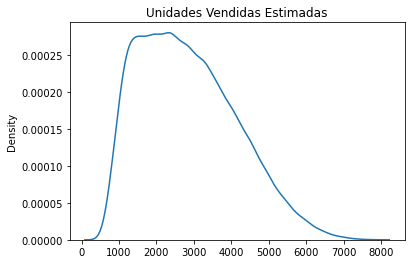

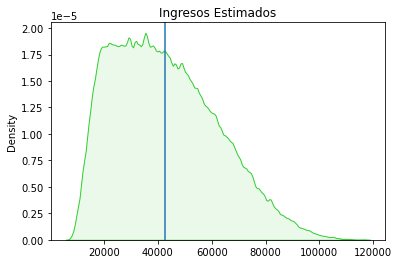

In [280]:
## Ejecutar la simulación con una distribucion normal para las ventas
simulacion_montecarlo(1)

Unidades vendidas promedio estimadas: 2758.05
Ingresospromedio estimadas: 41370.80
Otros Valores
Unidades vendidas Mediana: 2635.91
Unidades vendidas Harmonic_mean: 2386.53
Unidades vendidas Mode: 1850.19
Unidades vendidas Geometric_mean: 2573.25
Ventas estimadas (percentil 25): $2004.50
Ventas estimadas (percentil 75): $3385.20


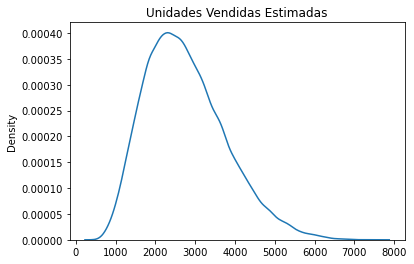

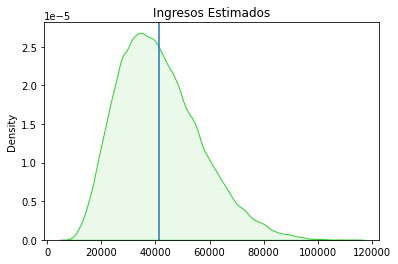

In [269]:
## Ejecutar la simulación con una distribucion triangular para las ventas
simulacion_montecarlo(2)

In [127]:
import numpy as np

# Parámetros de las distribuciones triangulares
precio_min = 50
precio_max = 100
precio_mas_probable = 70

gastos_min = 5000
gastos_max = 12000
gastos_mas_probable = 8000

# Número de iteraciones de la simulación
num_iteraciones = 10000

# Generación de muestras aleatorias para precio y gastos
precios = np.random.triangular(precio_min, precio_mas_probable, precio_max, num_iteraciones)
gastos = np.random.triangular(gastos_min, gastos_mas_probable, gastos_max, num_iteraciones)


print("Precios:",precios)
# Cálculo de las ventas (supongamos una relación lineal simple)
ventas = precios * (1000 - 0.1 * gastos)

# Estadísticas de las ventas
media_ventas = np.mean(ventas)
percentil_10 = np.percentile(ventas, 25)
percentil_90 = np.percentile(ventas, 75)

print(f"Ventas estimadas (media): ${media_ventas:.2f}")
print(f"Ventas estimadas (percentil 10): ${percentil_10:.2f}")
print(f"Ventas estimadas (percentil 90): ${percentil_90:.2f}")


Precios: [85.31333513 67.86644661 63.42438162 ... 81.62034384 74.55492091
 59.01308318]
Ventas estimadas (media): $12219.38
Ventas estimadas (percentil 10): $4763.00
Ventas estimadas (percentil 90): $19674.92


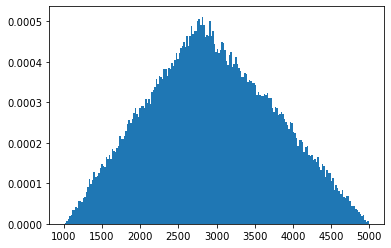

In [128]:
#Distribucion triangular
import matplotlib.pyplot as plt
h = plt.hist(np.random.triangular(1000, 2800, 5000, 100000), bins=200,
             density=True)
plt.show()

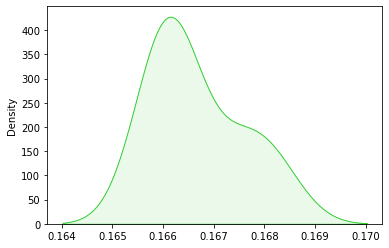

Probabilidades de obtener cada resultado después de 100000 lanzamientos:
Resultado 1: 0.17
Resultado 2: 0.17
Resultado 3: 0.17
Resultado 4: 0.17
Resultado 5: 0.17
Resultado 6: 0.17


In [288]:

import random

def lanzar_dado():
  """Función para simular el lanzamiento de un dado de 6 caras."""
  return random.randint(1, 6)

def simular_lanzamientos(n):
  """Función para simular 'n' lanzamientos de un dado y calcular la probabilidad de cada resultado."""
  resultados = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0}
  for _ in range(n):
    resultado = lanzar_dado()
    resultados[resultado] += 1
  
  #print("Resultados lanzaminetos",resultados)
  probabilidades = {resultado: valor / n for resultado, valor in resultados.items()}
  return probabilidades

n_lanzamientos = 100000  # Número de lanzamientos a simular
probabilidades = simular_lanzamientos(n_lanzamientos)

ax = sns.kdeplot(x = probabilidades,bw_adjust=0.99, fill = True, color = "limegreen", alpha = 0.1)  
plt.show()  



print(f"Probabilidades de obtener cada resultado después de {n_lanzamientos} lanzamientos:")
for resultado, probabilidad in probabilidades.items():
  print(f"Resultado {resultado}: {probabilidad:.2f}")

   Dado  Valor
0     1     10
1     2     30
2     3     30
3     4     30
4     5     30
5     6     50


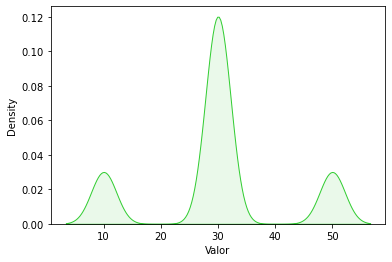

In [278]:
resultados = {1: 10, 2: 30, 3: 30, 4: 30, 5: 30, 6: 50}
df = pd.DataFrame(list(resultados.items()), columns=['Dado', 'Valor'])
df.set_index('Dado', inplace=True)
df_reset = df.reset_index()

# Mostrar el DataFrame
print( df_reset)
ax = sns.kdeplot(data = df_reset["Valor"],bw_adjust=0.25,fill = True, color = "limegreen", alpha = 0.1)  
plt.show() 
    
